<font size=7> Latencies Analysis

In [1]:
from human_hip.spike_data import curate_latencies, plot_vector_layout, cross_sttc, plot_pair_analysis
import pickle
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import numpy as np

import data

In [2]:

file = open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', 'rb')
sd = pickle.load(file)
file.close()

get acceptable neuron pairs

In [3]:
good_pairs = curate_latencies(sd)

18496 Starting Pairs
567 pairs above sttc cutoff
360 pairs above latencency cutoff
Starting cross_sttc calculation... might take a minute
77 pairs between cross_sttc cutoffs


plot arrows between neurons

/workspaces/human_hippocampus/src/human_hip/spike_data/plot_latencies.py:50: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrow(


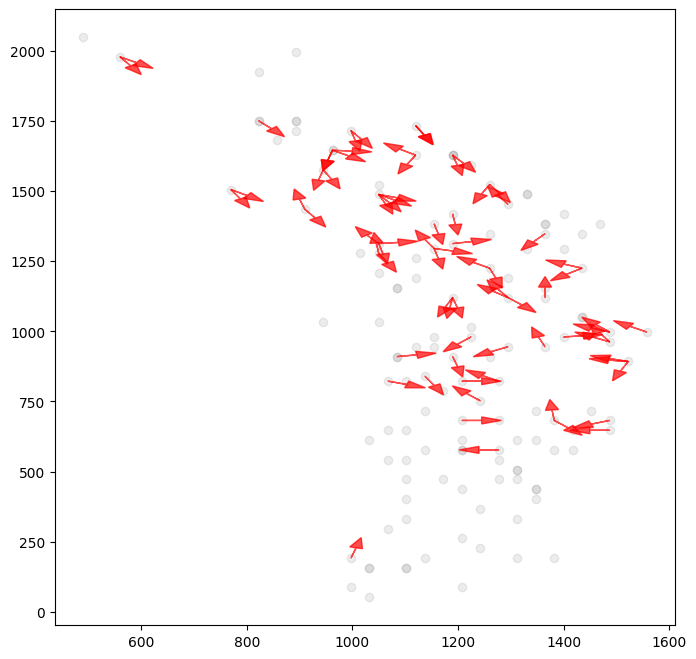

In [4]:
plot_vector_layout( sd, good_pairs )

show cross sttcs

In [5]:
@interact_manual
def showSttcs(num=(0,len(good_pairs)-1)):
    plt.plot( cross_sttc( good_pairs[num,0], good_pairs[num,1], sd) )
    plot_vector_layout( sd, np.array([good_pairs[num]]) , normalize=False )

interactive(children=(IntSlider(value=38, description='num', max=76), Button(description='Run Interact', style…

plot latency analysis for single pair

In [5]:
@interact_manual(num=(0,len(good_pairs)-1))
def analyzePair(num):
    plot_pair_analysis( good_pairs[num][0], good_pairs[num][1], sd)

interactive(children=(IntSlider(value=3, description='num', max=6), Button(description='Run Interact', style=B…